## Read and Plot the metrics from the testing of the CNN

### CNN ran with spatial component added, with the spectra binned into various channels/bin values & the metrics saved in ./metrics/ directory as .txt files

---

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
# setup array with the total number of channels (each bin contains 848/#channels)

channels = np.array([848, 424, 283, 212, 170, 142, 122, 106, 85, 53, 22, 15, 10, 5])

In [67]:
testimage = ['108', '000', 'north']

In [68]:
accuracy = {'108':[], '000':[], 'north':[]}
avg_prec = {'108':[], '000':[], 'north':[]}
avg_recall = {'108':[], '000':[], 'north':[]}
veg_prec = {'108':[], '000':[], 'north':[]}
veg_recall = {'108':[], '000':[], 'north':[]}

In [69]:
# loop through files reading:
# accuracy, avg precision and recall, and vegetation precision and recall

for testim in testimage:
    for channel in channels:
        filename = "./metrics/CNN_spatial_train_108_test_" + testim + \
                    "_binned_" + str(channel) + "_metrics.txt"
        f = open(filename, "r")
        f1 = f.readlines()

        # read accuracy from 13th line
        accuracy[testim].append(float(f1[12]))

        # read avg_prec and avg_recall from 28th line
        Nums = []
        for num in f1[27].split():
            try:
                Nums.append(float(num))
            except ValueError:
                pass
        avg_prec[testim].append(Nums[0])
        avg_recall[testim].append(Nums[1])        
        
        # read veg_prec and veg_recall from 20th line
        Nums = []
        for num in f1[19].split():
            try:
                Nums.append(float(num))
            except ValueError:
                pass
        veg_prec[testim].append(Nums[0])
        veg_recall[testim].append(Nums[1])  
        f.close()

In [70]:
print(accuracy)

{'108': [0.90125, 0.9025, 0.9271875, 0.935, 0.88125, 0.904375, 0.9034375, 0.921875, 0.9040625, 0.8840625, 0.9003125, 0.9075, 0.8903125, 0.821875], '000': [0.5503374578177728, 0.5233408323959505, 0.5658042744656918, 0.5396512935883014, 0.5134983127109112, 0.5511811023622047, 0.5345894263217098, 0.5500562429696289, 0.5340269966254219, 0.5396512935883014, 0.6212035995500562, 0.6349831271091113, 0.6150168728908887, 0.5826771653543307], 'north': [0.4250797024442083, 0.4680127523910733, 0.47523910733262487, 0.46439957492029754, 0.4922422954303932, 0.42763018065887354, 0.44208289054197664, 0.39723698193411267, 0.46886291179596173, 0.43761955366631244, 0.4718384697130712, 0.47970244420828906, 0.4263549415515409, 0.34070138150903295]}


In [71]:
print(avg_prec)

{'108': [0.87, 0.9, 0.92, 0.93, 0.89, 0.89, 0.9, 0.91, 0.9, 0.87, 0.9, 0.89, 0.89, 0.79], '000': [0.66, 0.62, 0.67, 0.67, 0.59, 0.69, 0.65, 0.67, 0.64, 0.61, 0.61, 0.65, 0.68, 0.59], 'north': [0.31, 0.31, 0.39, 0.31, 0.37, 0.3, 0.36, 0.27, 0.36, 0.25, 0.27, 0.27, 0.22, 0.22]}


In [72]:
print(avg_recall)

{'108': [0.9, 0.9, 0.93, 0.94, 0.88, 0.9, 0.9, 0.92, 0.9, 0.88, 0.9, 0.91, 0.89, 0.82], '000': [0.55, 0.52, 0.57, 0.54, 0.51, 0.55, 0.53, 0.55, 0.53, 0.54, 0.62, 0.63, 0.62, 0.58], 'north': [0.43, 0.47, 0.48, 0.46, 0.49, 0.43, 0.44, 0.4, 0.47, 0.44, 0.47, 0.48, 0.43, 0.34]}


In [73]:
print(veg_prec)

{'108': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '000': [0.98, 0.97, 0.95, 0.96, 0.99, 0.97, 0.97, 0.96, 0.96, 0.97, 0.97, 0.96, 0.97, 0.95], 'north': [0.96, 0.9, 0.93, 0.69, 0.93, 0.61, 0.7, 0.54, 0.81, 0.69, 0.86, 0.89, 0.62, 0.29]}


In [74]:
print(veg_recall)

{'108': [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.99, 0.98, 0.93], '000': [0.91, 0.92, 0.97, 0.94, 0.91, 0.93, 0.94, 0.94, 0.95, 0.91, 0.9, 0.91, 0.9, 0.78], 'north': [0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


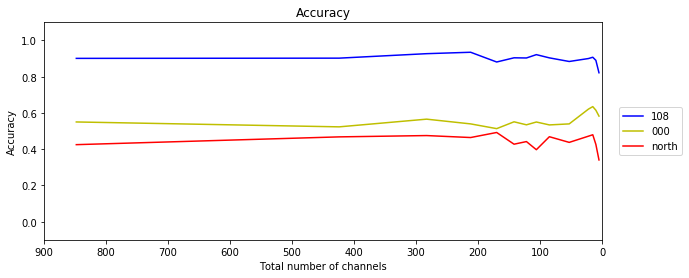

In [75]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, accuracy['108'], color='b', label='108')
ax.plot(channels, accuracy['000'], color='y', label='000')
ax.plot(channels, accuracy['north'], color='r', label='north')
ax.set(title="Accuracy")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Accuracy")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

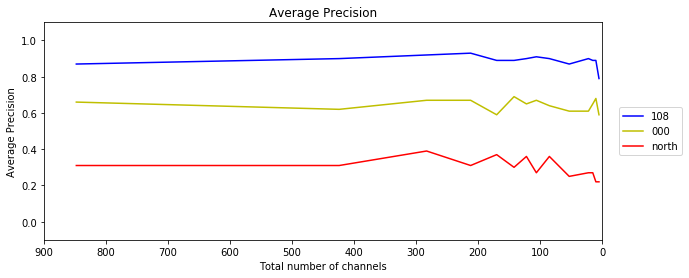

In [76]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, avg_prec['108'], color='b', label='108')
ax.plot(channels, avg_prec['000'], color='y', label='000')
ax.plot(channels, avg_prec['north'], color='r', label='north')
ax.set(title="Average Precision")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Average Precision")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

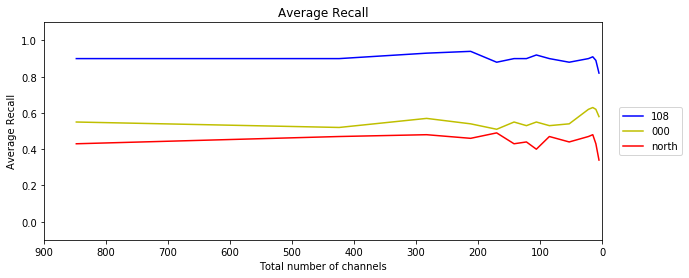

In [77]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, avg_recall['108'], color='b', label='108')
ax.plot(channels, avg_recall['000'], color='y', label='000')
ax.plot(channels, avg_recall['north'], color='r', label='north')
ax.set(title="Average Recall")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Average Recall")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

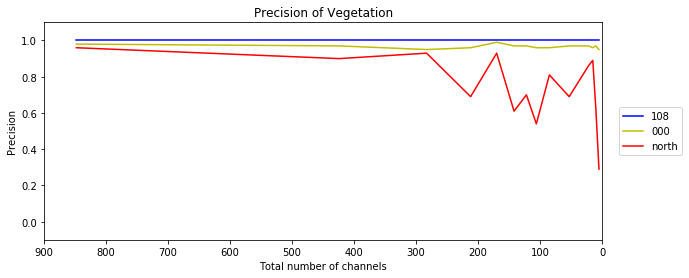

In [78]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, veg_prec['108'], color='b', label='108')
ax.plot(channels, veg_prec['000'], color='y', label='000')
ax.plot(channels, veg_prec['north'], color='r', label='north')
ax.set(title="Precision of Vegetation")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Precision")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

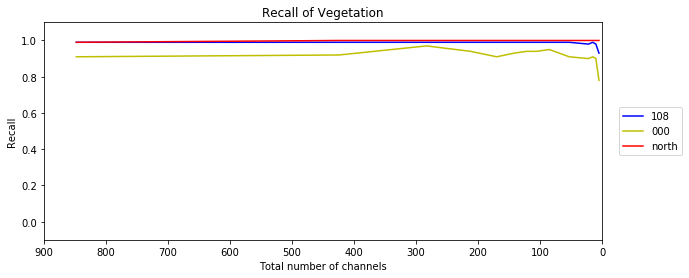

In [79]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, veg_recall['108'], color='b', label='108')
ax.plot(channels, veg_recall['000'], color='y', label='000')
ax.plot(channels, veg_recall['north'], color='r', label='north')
ax.set(title="Recall of Vegetation")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Recall")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

In [174]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def plot_predict_map(image1, image2, image3, i):
    bins = channels[i]
    acc = np.around(np.array([accuracy['108'][i], accuracy['000'][i], accuracy['north'][i]]),2)
    pre = np.around(np.array([avg_prec['108'][i], avg_prec['000'][i], avg_prec['north'][i]]),2)
    rec = np.around(np.array([avg_recall['108'][i], avg_recall['000'][i], avg_recall['north'][i]]),2)
    vpre = np.around(np.array([veg_prec['108'][i], veg_prec['000'][i], veg_prec['north'][i]]),2)
    vrec = np.around(np.array([veg_recall['108'][i], veg_recall['000'][i], veg_recall['north'][i]]),2)
    img1 = mpimg.imread(image1)
    img2 = mpimg.imread(image2)
    img3 = mpimg.imread(image3)
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20,6))
    imgplot1 = ax1.imshow(img1)
    imgplot2 = ax2.imshow(img2)
    imgplot3 = ax3.imshow(img3)
    ax1.set_xlim(35, 1015)
    ax1.set_ylim(500, 5)
    ax1.set_title(r"$\bf{" + str(bins) + "}$" + ': 108/' + 'a: ' + r"$\bf{" + str(acc[0]) + "}$" 
                  + '/p: ' + r"$\bf{" + str(pre[0]) + "}$" + '/r: ' + r"$\bf{" + str(rec[0]) + "}$"
                  + '/vp: '  + r"$\bf{" + str(vpre[0]) + "}$" + '/vr: '  + r"$\bf{" + str(vrec[0]) + "}$", loc='left')
    ax1.set_axis_off()
    ax2.set_xlim(35, 1015)
    ax2.set_ylim(500, 5)
    ax2.set_title(r"$\bf{" + str(bins) + "}$" + ': 000/' + 'a: ' + r"$\bf{" + str(acc[1]) + "}$" 
                  + '/p: ' + r"$\bf{" + str(pre[1]) + "}$" + '/r: ' + r"$\bf{" + str(rec[1]) + "}$"
                  + '/vp: '  + r"$\bf{" + str(vpre[1]) + "}$" + '/vr: '  + r"$\bf{" + str(vrec[1]) + "}$", loc='left')
    ax2.set_axis_off()
    ax3.set_xlim(35, 1015)
    ax3.set_ylim(500, 5)
    ax3.set_title(r"$\bf{" + str(bins) + "}$" + ': north/' + 'a: ' + r"$\bf{" + str(acc[2]) + "}$" 
                  + '/p: ' + r"$\bf{" + str(pre[2]) + "}$" + '/r: ' + r"$\bf{" + str(rec[2]) + "}$"
                  + '/vp: '  + r"$\bf{" + str(vpre[2]) + "}$" + '/vr: '  + r"$\bf{" + str(vrec[2]) + "}$", loc='left')
    ax3.set_axis_off()
    plt.show()


TITLE:
# of channels: image / accuracy / avg. precision / avg. recall / vegetation precision / vegetation recall


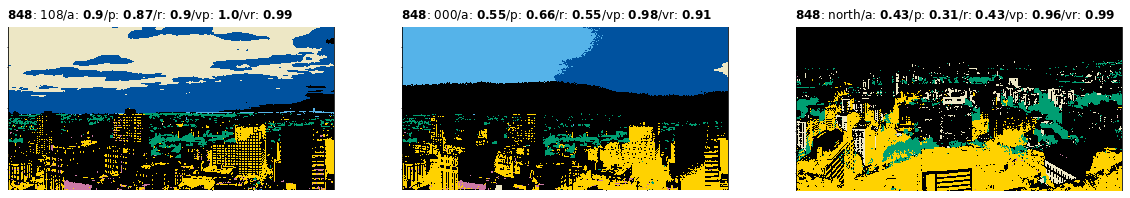

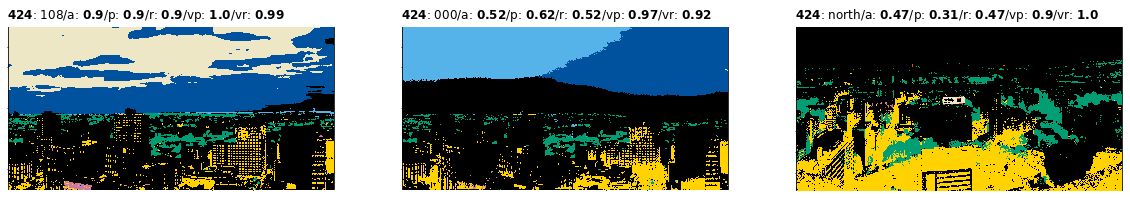

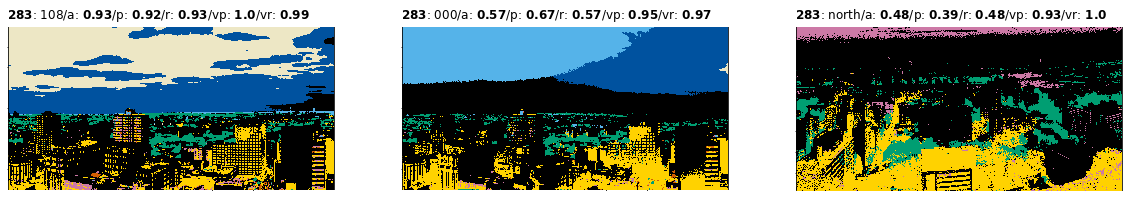

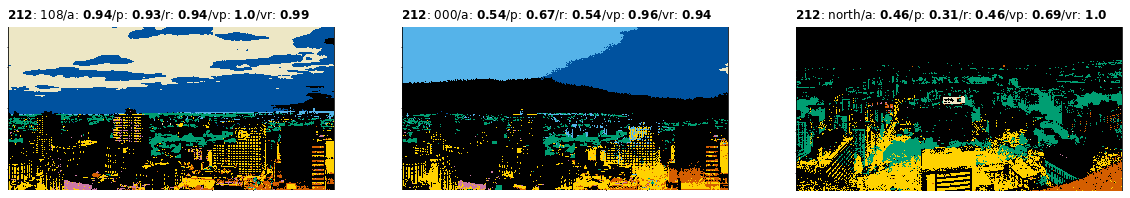

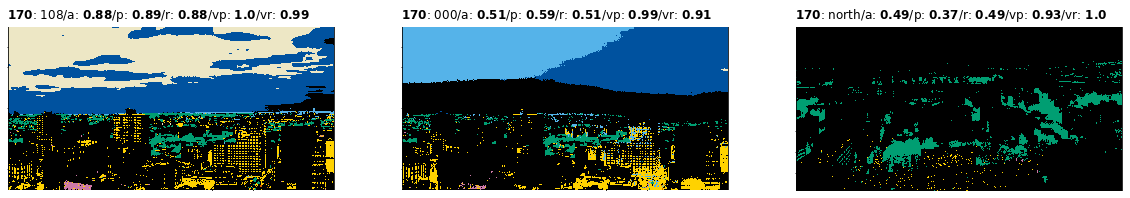

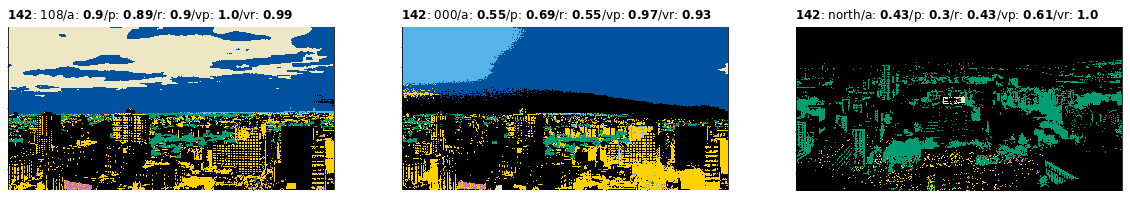

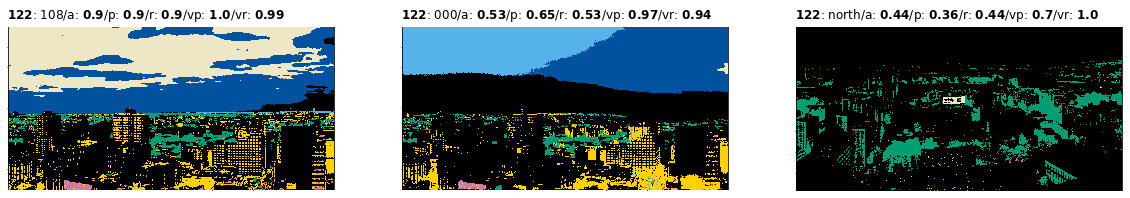

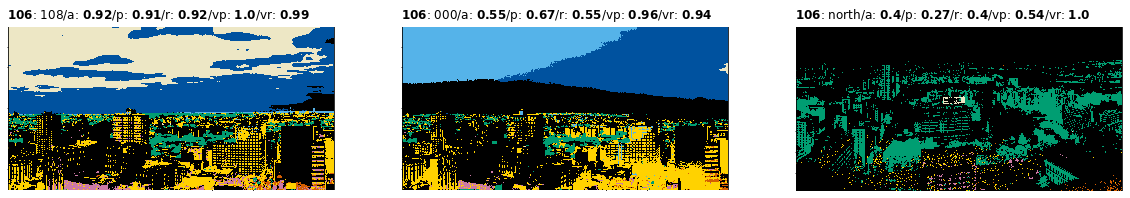

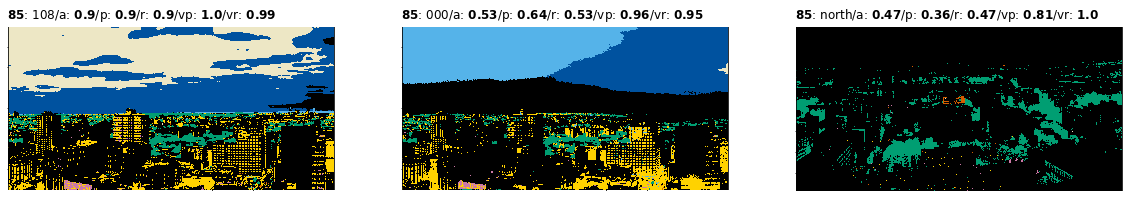

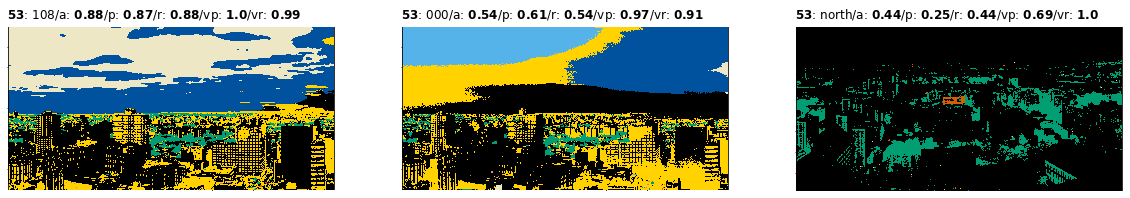

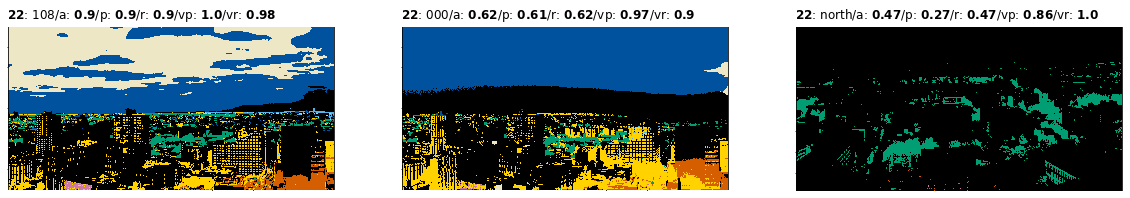

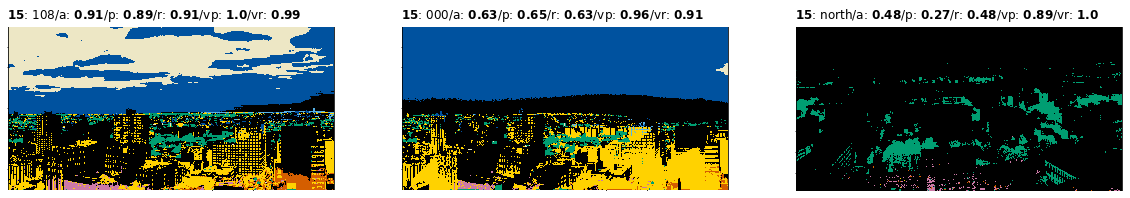

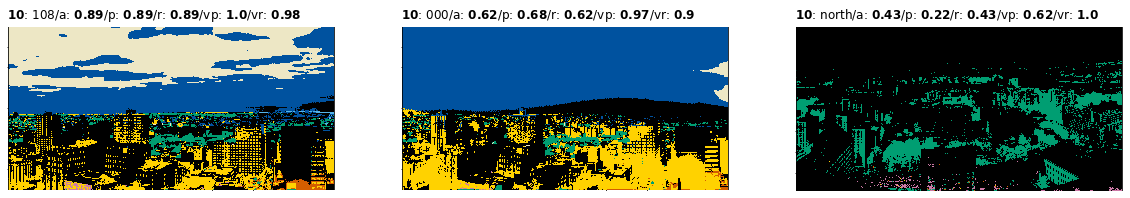

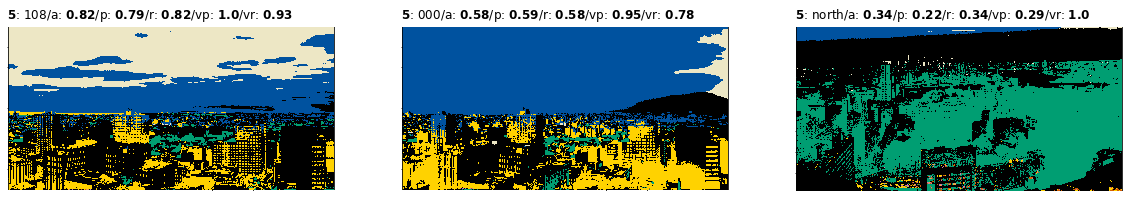

In [176]:
print("TITLE:")
print("# of channels: image / accuracy / avg. precision / avg. recall / vegetation precision / vegetation recall")

image1 = './plots/CNN_spatial_train_108_6_108_predict_map.png'
image2 = './plots/CNN_spatial_train_108_9_000_predict_map.png'
image3 = './plots/CNN_spatial_train_108_11_north_predict_map.png'
plot_predict_map(image1, image2, image3, 0)

for i in range(1,channels.shape[0]):
    bins = channels[i]
    image1 = './plots/CNN_spatial_train_108_binned_' + str(bins) + '_6_108_predict_map.png'
    image2 = './plots/CNN_spatial_train_108_binned_' + str(bins) + '_9_000_predict_map.png'
    image3 = './plots/CNN_spatial_train_108_binned_' + str(bins) + '_11_north_predict_map.png'
    plot_predict_map(image1, image2, image3, i)